In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset using pandas. In this case our dataset is a CVS file
dataset = pd.read_csv('Data.csv') 

In [3]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
dataset.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [5]:
dataset["Age"].values+dataset["Salary"]

0    72044.0
1    48027.0
2    54030.0
3    61038.0
4        NaN
5    58035.0
6        NaN
7    79048.0
8    83050.0
9    67037.0
Name: Salary, dtype: float64

In [6]:
############## Read independant variables #################
# Now we are going to select all our independant variables. In this case this
# will be the country, age and salary. We will store them in the X variable.

# iloc - first parameter are the rows of the dataset, the second parameter
# are the columns. -1 means we don't take the last column, because the last
# column is our dependant variable.
X = dataset.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [7]:
############## Read dependant variables #################
# In this dataset our only dependant variable is the last column (index 3)
# which contains whether or not the customer purchased the item.  
Y = dataset.iloc[:, 3].values
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [8]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [9]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [10]:
############## Taking care of the missing data #################
# The age and salary columns have missing data. We are going to use the sklearn
# preprocessing library to replace the missing values with the average value. 
from sklearn.preprocessing import Imputer

In [11]:
# The missing values in our dataset are labeled as 'NaN'. Strategy is mean and 
# the axis is 0 (column)
imputer = Imputer(missing_values = 'NaN', strategy = "mean", axis = 0)
imputer

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [12]:
# Replace the missing values in our independant variables. Only select the 
# columns that have missing data (column index 1 and 2). 
imputer1 = imputer.fit(X[:, 1:3])
imputer

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [13]:
# Apply the transformation to the X variable
X[:, 1:3] = imputer1.transform(X[:, 1:3]);
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [14]:
############## Taking care of the categorical data #################
# Categorical data is text data, such as the country and purchased columns.
# We can't do anything with these columns at the moment, because they are text.
# We need to convert them to numerical data (encode them).
from sklearn.preprocessing import LabelEncoder

In [15]:
# The first column we are going to transform is the country column
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [16]:
# Because spain isn't greater then france or germany, we need to turn the
# country column into three different columns. Otherwise our model will think 
# there is an order for these countries. One for each country. For this we are
# going to use the OneHotEncoder class. 
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder(categorical_features = [0]) # country column index
X = oneHotEncoder.fit_transform(X).toarray();
X

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [17]:
# The second column we are going to transform is the purchased column
labelencoder_Y = LabelEncoder()
Y  = labelencoder_X.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [18]:
############## Splitting the dataset into a training and a test set #################
from sklearn.model_selection import train_test_split

In [26]:
# We are going to use 20% of our dataset as a test set. The training set will
# be used by our model to train. When it's done, it will use the test set to
# verify if it understands the correlations between the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

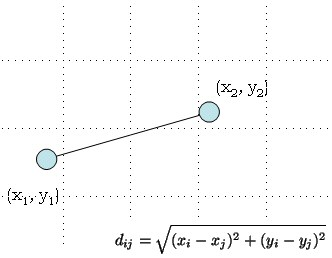

In [29]:
############## Feature scaling #################
# Variables need to be on the same scale. Because the salary column contains
# much higher number then the age column, our machine learning algorithm will
# neglect the age column. Therefor, we need to put them on the same scale.
# For most libraries this won't be necessery because they do it themselves
from sklearn.preprocessing import StandardScaler
standardscaler_X = StandardScaler()
X_train = standardscaler_X.fit_transform(X_train)
X_test = standardscaler_X.transform(X_test)

In [30]:
X_train

array([[-1.        , -0.57735027,  1.73205081, -1.51364653, -1.50749915],
       [-1.        ,  1.73205081, -0.57735027,  1.48109499,  1.55119478],
       [ 1.        , -0.57735027, -0.57735027,  1.22068269,  1.20162976],
       [-1.        , -0.57735027,  1.73205081, -0.08137885, -0.37141284],
       [ 1.        , -0.57735027, -0.57735027, -0.211585  ,  0.1529347 ],
       [-1.        ,  1.73205081, -0.57735027, -1.12302807, -0.98315162],
       [ 1.        , -0.57735027, -0.57735027,  0.69985807,  0.58989097],
       [ 1.        , -0.57735027, -0.57735027, -0.47199731, -0.6335866 ]])